# **The Dogs vs. Cats dataset** 
**It was made available by Kaggle as part of a computer-vision competition in late 2013. You can download the original dataset from www.kaggle.com/c/dogs-vs-cats/data**

This dataset contains 25,000 images of dogs and cats (12,500 from each class) and is 543 MB (compressed). After downloading and uncompressing it, you’ll create a new dataset containing three subsets: a training set with 1,000 samples of each class, a validation set with 500 samples of each class, and a test set with 500 samples of each class.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os, shutil

**Path to the directory where the original dataset was uncompressed**

In [0]:
BASE_DIR = '/content/drive/My Drive/Academics/Semester 6/Deep Learning/Lab 2'

In [0]:
cd /content/drive/My Drive/Academics/Semester 6/Deep Learning/Lab 2

/content/drive/My Drive/Academics/Semester 6/Deep Learning/Lab 2


In [0]:
import zipfile
with zipfile.ZipFile(BASE_DIR+'/Cat-Dog-mini.zip', 'r') as zip_ref:
    zip_ref.extractall(BASE_DIR+'/Cat-Dog-Dataset/')

In [0]:
original_dataset_dir = os.path.join(BASE_DIR,'Cat-Dog-Dataset','Cat-Dog-mini')

**Directory where you’ll store your smaller dataset**

In [0]:
base_dir = BASE_DIR+'/cats_and_dogs_small'
os.mkdir(base_dir)

**Directories for the training, validation, and test splits**

In [0]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

In [0]:
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [0]:
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

**Directory with training cat pictures**

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

**Directory with training dog pictures**

In [0]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

**Directory with validation cat pictures**

In [0]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

**Directory with validation dog pictures**

In [0]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

**Directory with test cat pictures**

In [0]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

**Directory with test dog pictures**

In [0]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

**Copies the first 1,000 cat images to train_cats_dir**

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

**Copies the next 500 cat images to validation_cats_dir**

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copyfile(src, dst)

**Copies the next 500 cat images to test_cats_dir**

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copyfile(src, dst)

**Copies the first 1,000 dog images to train_dogs_dir**

In [0]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copyfile(src, dst)

**Copies the next 500 dog images to validation_dogs_dir**

In [0]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copyfile(src, dst)

***Copies the next 500 dog images to test_dogs_dir***

In [0]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copyfile(src, dst)

**As a sanity check, let’s count how many pictures are in each training split (train/validation/test):**

In [0]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


**So we have 2,000 training images, 1,000 validation images, and 1,000 test images. Each split contains the same number of samples from each class: this is a balanced binary-classification problem, which means classification accuracy will be an appropriate measure of success.**
# **Building your network**

### **Instantiating a small convnet for dogs vs. cats classification**

In [0]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))

In [0]:
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

***Let’s look at how the dimensions of the feature maps change with every successive layer:***

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

# **Configuring the model for training**
**For the compilation step, you’ll go with the RMSprop optimizer. Because you ended the network with a single sigmoid unit, you’ll use binary crossentropy as the loss**

In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# **Data preprocessing**

Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows:
1.   Read the picture files.
2.   Decode the JPEG content to RGB grids of pixels.
3.   Convert these into floating-point tensors.
4.   Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

**Using ImageDataGenerator to read images from directories**

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


The output of one of these generators: it yields batches of 150 × 150 RGB images (shape (20, 150, 150, 3)) and binary labels (shape (20,)).

There are 20 samples in each batch (the batch size). 

**Note**: The generator yields these batches indefinitely: it loops endlessly over the images in the target folder. For this reason, you need to break the iteration loop at some point:

In [0]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Let’s fit the model to the data using the generator. You do so using the fit_generator method, the equivalent of fit for data generators like this one. It expects as its first argument a Python generator that will yield batches of inputs and targets indefinitely, like this one does. Because the data is being generated endlessly, the Keras model needs to know how many samples to draw from the generator before declaring an epoch over.

This is the role of the steps_per_epoch argument: after having drawn steps_per_epoch batches from the generator—that is, after having run for steps_per_epoch gradient descent steps—the fitting process will go to the next epoch. In this case, batches are 20 samples, so it will take 100 batches until you see your target of 2,000 samples.

When using fit_generator, you can pass a validation_data argument, much as with the fit method. It’s important to note that this argument is allowed to be a data generator, but it could also be a tuple of Numpy arrays. If you pass a generator as validation_data, then this generator is expected to yield batches of validation data endlessly; thus you should also specify the validation_steps argument, which tells the process how many batches to draw from the validation generator for evaluation.

# **Fitting the model using a batch generator**

In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=3,
    validation_data=validation_generator,
    validation_steps=50)




Epoch 1/3





100/100 [==============================] - 28s 281ms/step - loss: 0.6888 - acc: 0.5300 - val_loss: 0.6729 - val_acc: 0.5650
Epoch 2/3
100/100 [==============================] - 12s 117ms/step - loss: 0.6607 - acc: 0.6130 - val_loss: 0.6401 - val_acc: 0.6570
Epoch 3/3
100/100 [==============================] - 11s 114ms/step - loss: 0.6073 - acc: 0.6790 - val_loss: 0.6819 - val_acc: 0.5970


# **Saving the model**

In [0]:
model.save('cats_and_dogs_small_1.h5')

## **Displaying curves of loss and accuracy during training**

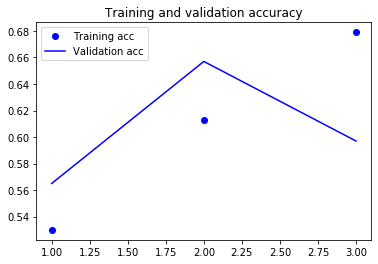

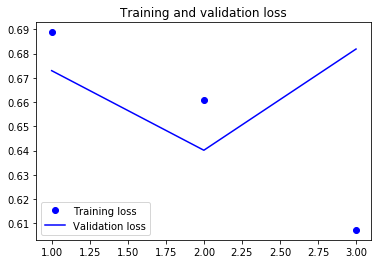

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

These plots are characteristic of overfitting. The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%. The validation loss reaches its minimum after only five epochs and then stalls, whereas the training loss keeps decreasing linearly until it reaches nearly 0. 

Because you have relatively few training samples (2,000), overfitting will be your number-one concern. You already know about a number of techniques that can help mitigate overfitting, such as dropout and weight decay (L2 regularization). We’re now going to work with a new one, specific to computer vision and used almost universally when processing images with deep-learning models: data augmentation.

# **Using data augmentation**
Overfitting is caused by having too few samples to learn from, rendering you unable to train a model that can generalize to new data. Given infinite data, your model would be exposed to every possible aspect of the data distribution at hand: you would never overfit. Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, your model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better. 

In Keras, this can be done by configuring a number of random transformations to be performed on the images read by the ImageDataGenerator instance.

**Setting up a data augmentation configuration via ImageDataGenerator**

In [0]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

**Let’s quickly go over this code:**

*   **rotation_range** is a value in degrees (0–180), a range within which to randomly rotate pictures.
*   **width_shift** and **height_shift** are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
*   **shear_range** is for randomly applying shearing transformations.
*   **zoom_range** is for randomly zooming inside pictures.
*   **horizontal_flip** is for randomly flipping half the images horizontally—relevant when there are no assumptions of horizontal asymmetry (for example, real-world pictures).
*   **fill_mode** is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

## **Displaying some randomly augmented training images**

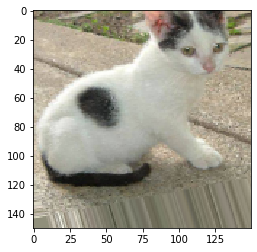

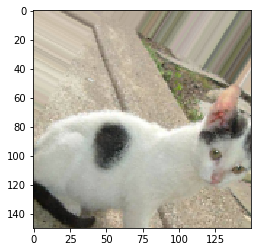

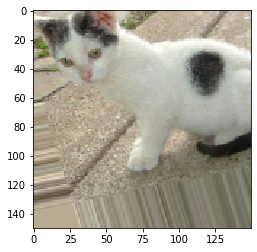

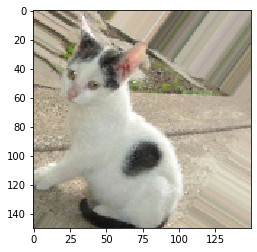

In [0]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
          fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()

# Defining a new convnet that includes dropout

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# **Training the convnet using data-augmentation generators**

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=1,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/1
100/100 [==============================] - 36s 355ms/step - loss: 0.6905 - acc: 0.5362 - val_loss: 0.6875 - val_acc: 0.5070


## ***Saving the model***

In [0]:
model.save('cats_and_dogs_small_2.h5')

# **Visualizing what convnets learn**

### Visualizing intermediate activations

In [0]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

**Preprocessing a single image**

In [0]:
img_path = original_dataset_dir+'/cat.1000.jpg'

In [0]:
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
#Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 150, 150, 3)


**Displaying the test picture**

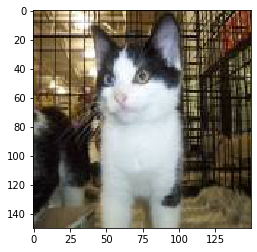

In [0]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

**Instantiating a model from an input tensor and a list of output tensors**

In order to extract the feature maps you want to look at, you’ll create a Keras model that takes batches of images as input, and outputs the activations of all convolution and pooling layers. 

To do this, you’ll use the Keras class Model. A model is instantiated using two arguments: an input tensor (or list of input tensors) and an output tensor (or list of output tensors). 

The resulting class is a Keras model, just like the Sequential models you’re familiar with, mapping the specified inputs to the specified outputs.

In [0]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

When fed an image input, this model returns the values of the layer activations in the original model. 

This is the first time you’ve encountered a multi-output model in this
book: until now, the models you’ve seen have had exactly one input and one output.
In the general case, a model can have any number of inputs and outputs. This one has
one input and eight outputs: one output per layer activation

In [0]:
#Returns a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)
print(activations)

[array([[[[0.08434079, 0.        , 0.14251211, ..., 0.        ,
          0.2721391 , 0.        ],
         [0.08865007, 0.        , 0.14256737, ..., 0.        ,
          0.28535134, 0.        ],
         [0.0943362 , 0.        , 0.14979988, ..., 0.        ,
          0.29295647, 0.        ],
         ...,
         [0.08900479, 0.01181277, 0.1320318 , ..., 0.        ,
          0.18447758, 0.05825499],
         [0.10226144, 0.        , 0.1488268 , ..., 0.        ,
          0.227924  , 0.0124094 ],
         [0.11279023, 0.        , 0.07448804, ..., 0.        ,
          0.20329192, 0.05571173]],

        [[0.06287473, 0.        , 0.11813553, ..., 0.        ,
          0.23934612, 0.        ],
         [0.0665768 , 0.        , 0.11741895, ..., 0.        ,
          0.25521863, 0.        ],
         [0.0688382 , 0.        , 0.12422363, ..., 0.        ,
          0.2651311 , 0.        ],
         ...,
         [0.09227674, 0.        , 0.12378967, ..., 0.        ,
          0.21394879, 0.

For instance, this is the activation of the first convolution layer for the cat image input:

In [0]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


It’s a 148 × 148 feature map with 32 channels. 

Let’s try plotting the fourth channel of the activation of the first layer of the original model

# Visualizing the fourth channel

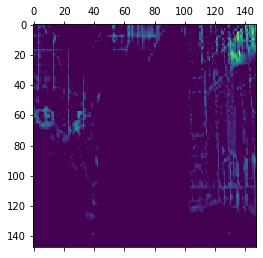

In [0]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 31], cmap='viridis')

# **Visualizing every channel in every intermediate activation**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


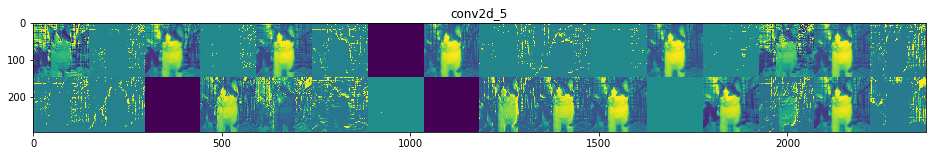

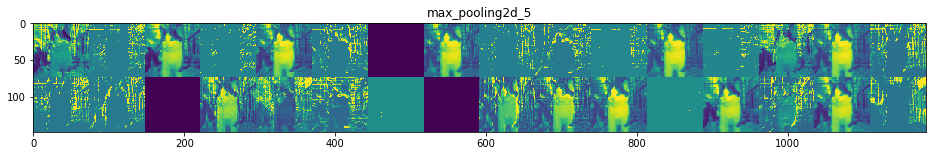

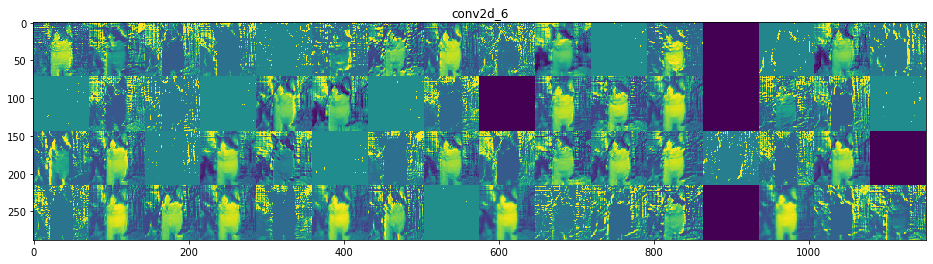

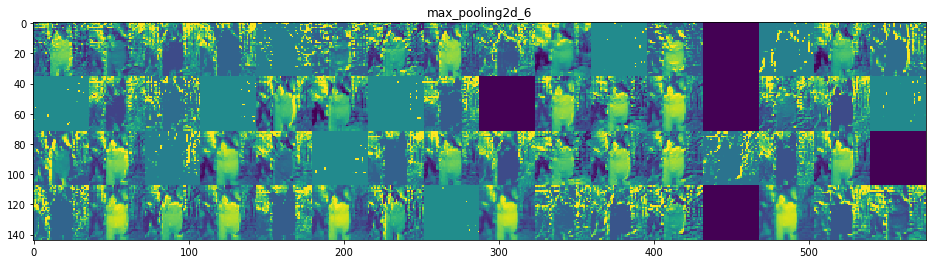

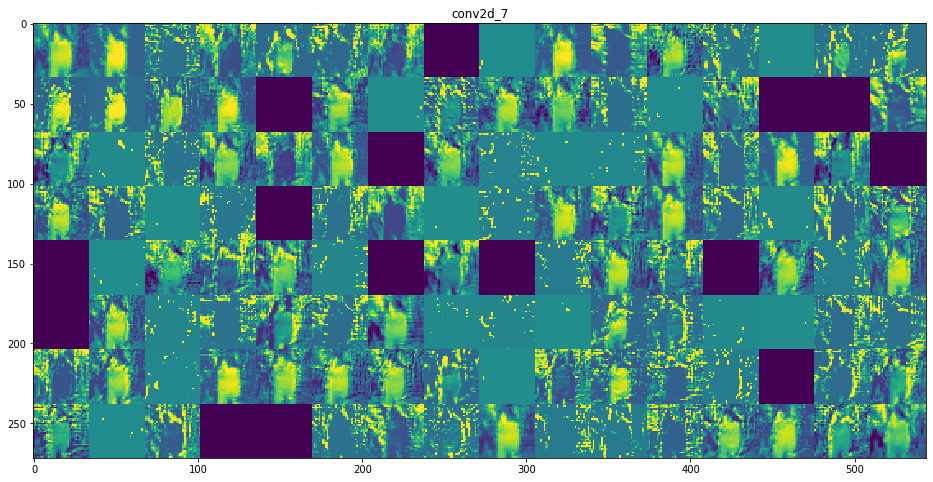

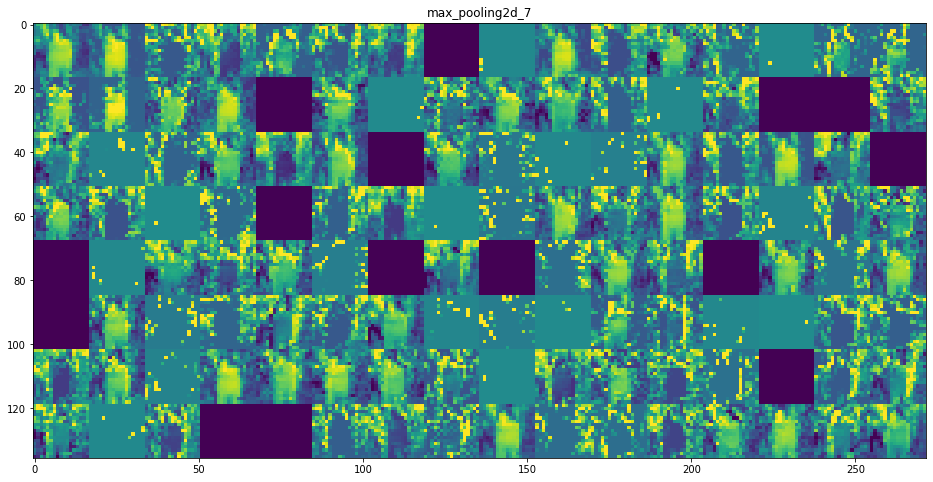

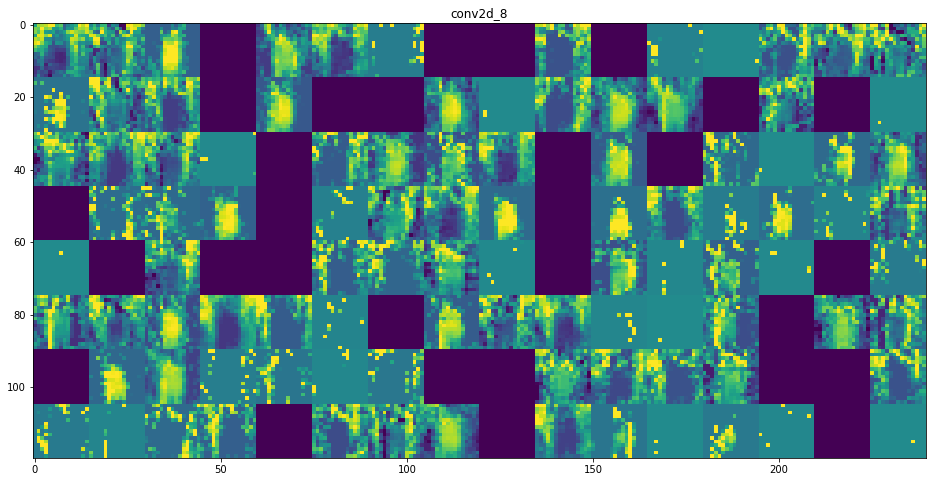

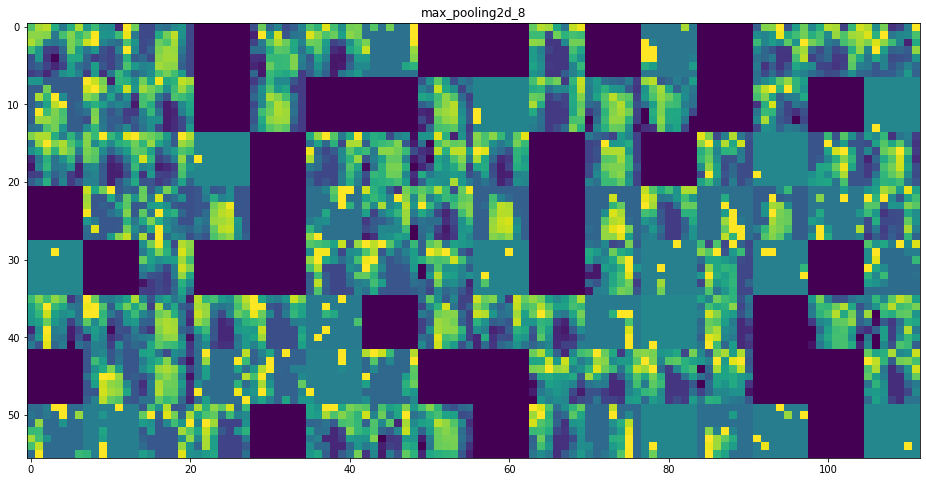

In [0]:
layer_names = []
# Names of the layers, so you can have them as part of your plot
for layer in model.layers[:8]:
  layer_names.append(layer.name)

images_per_row = 16

# Displays the feature maps
for layer_name, layer_activation in zip(layer_names, activations):
  # Number of features in the feature map
  n_features = layer_activation.shape[-1]

  # The feature map has shape (1, size, size, n_features).
  size = layer_activation.shape[1]
  
  # Tiles the activation channels in this matrix
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  
  # Tiles each filter into a big horizontal grid
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0,:, :,
                                       col * images_per_row + row]
      
      # Post-processes the feature to make it visually palatable
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      
      # Displays the grid
      display_grid[col * size : (col + 1) * size,
                   row * size : (row + 1) * size] = channel_image
  scale = 1. / size
  plt.figure(figsize=(scale * display_grid.shape[1],
                      scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')